In [88]:
import pandas as pd
file_path = "./ref/대전교통공사_시간대별 승하차인원_20250131.csv"
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head()

,날짜,역번호,역명,구분,03-04시,04-05시,05-06시,06-07시,07-08시,08-09시,...,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-00시,00-01시,01-02시,02-03시
0,2025-01-01,1101,판암,승차,0,0,45,38,57,112,...,145,102,69,63,30,34,15,0,0,0
1,2025-01-01,1101,판암,하차,0,0,22,51,39,52,...,182,138,103,99,99,84,37,16,0,0
2,2025-01-01,1102,신흥,승차,0,0,13,15,24,52,...,82,54,28,22,13,18,2,0,0,0
3,2025-01-01,1102,신흥,하차,0,0,12,28,26,26,...,79,63,51,71,43,41,29,1,0,0
4,2025-01-01,1103,대동,승차,0,0,32,41,60,88,...,116,87,65,64,49,37,20,0,0,0


In [89]:
columns0 = ['date', 'num', 'name', 'type']
time_col = [f"{i}~{i+1}H" for i in range(1, 24)]
columns = columns0 + time_col + ['24~01H']
df.columns = columns[:len(df.columns)] 

valid_time_col = [col for col in time_col if col in df.columns]
df['total'] = df[valid_time_col].sum(axis=1)
df = df.loc[:, :'total']

In [90]:
import matplotlib.pyplot as plt

data = df.groupby(['date', 'num', 'name']).sum().reset_index()
total_data = data[data['date'] == '2025-01-01']

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2coding"

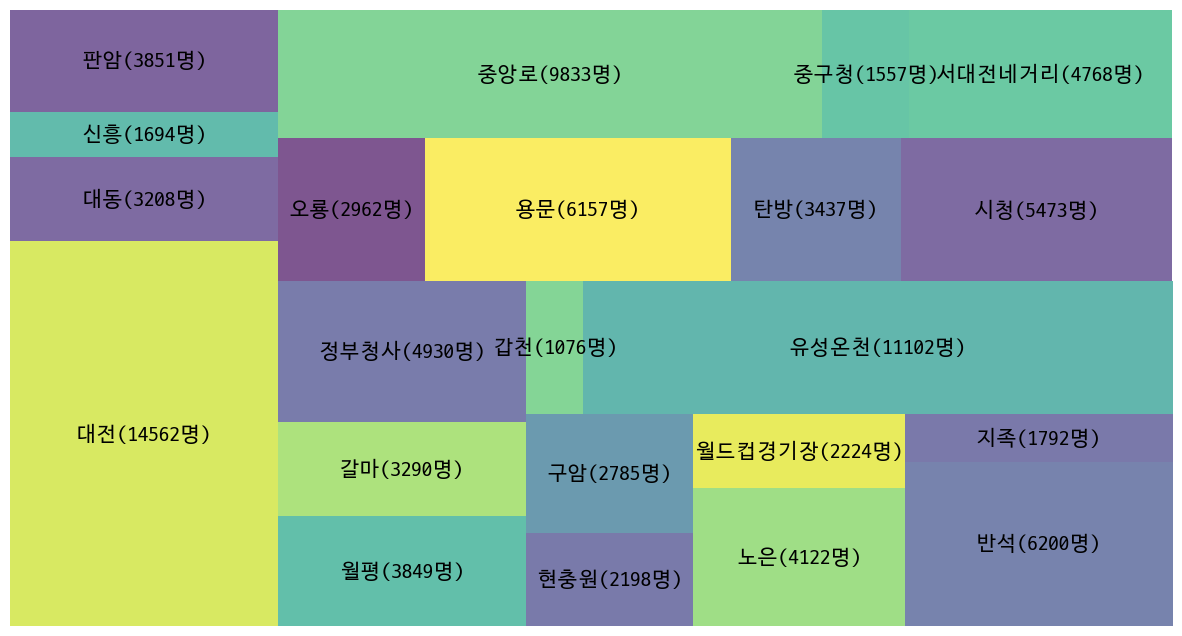

In [116]:
import squarify

plt.figure(figsize=(15,8))
squarify.plot(sizes=total_data['total'], label=[f"{x[0]}({x[1]}명)" for x in zip(total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size'] = 15
plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()